In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the House Prices dataset
house_prices_df = pd.read_csv('train.csv')

In [5]:
# Display basic information about the dataset
print(house_prices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Display summary statistics
print(house_prices_df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
# Check for missing values
missing_values = house_prices_df.isnull().sum()

# Handle missing values (e.g., imputation or removal)
# Example: Impute missing values for numerical columns with the mean
house_prices_df['LotFrontage'].fillna(house_prices_df['LotFrontage'].mean(), inplace=True)

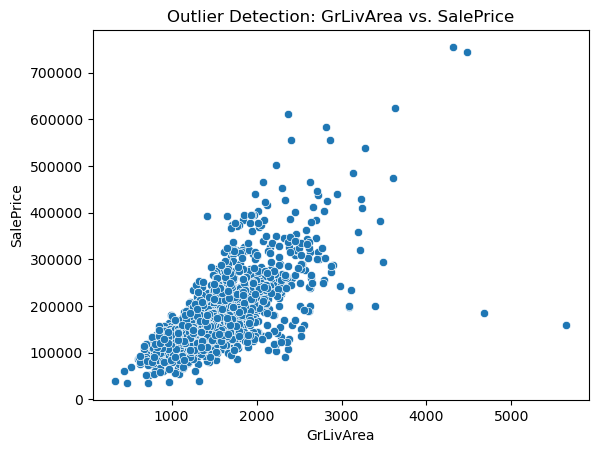

In [8]:
# Explore numerical features for outliers
# Example: Identify and handle outliers in the 'GrLivArea' column
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house_prices_df)
plt.title('Outlier Detection: GrLivArea vs. SalePrice')
plt.show()

In [9]:
# Remove outliers
house_prices_df = house_prices_df[house_prices_df['GrLivArea'] < 4000]

In [10]:
# Encode categorical variables (e.g., using pd.get_dummies for one-hot encoding)
house_prices_df = pd.get_dummies(house_prices_df, columns=['MSZoning', 'Street', 'Alley'], drop_first=True)

In [11]:
# Scale numerical features (e.g., using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
house_prices_df[['LotFrontage', 'GrLivArea']] = scaler.fit_transform(house_prices_df[['LotFrontage', 'GrLivArea']])

In [12]:
# Map ordinal categorical variables to numerical values
ordinal_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
house_prices_df['ExterQual'] = house_prices_df['ExterQual'].map(ordinal_mapping)